# 웹파이썬 프로그래밍 Term Project

## 선정한 주제 : 여행 정보 통합 프로그램

### (1) 주제 선정 이유

여행 계획을 짤 때 일반적으로 숙소 예약, 교통편 예매, 여행 갈 지역의 맛집 및 명소들에 대한 정보 검색을 하곤 한다. 숙소예약 정보를 찾기 위해서는 ```호텔스 컴바인```이나 ```에어비앤비``` 등의 숙박 사이트를 이용하고, 교통편을 찾기 위해 ```항공편 예매 사이트```, ```버스 or 기차 예매 사이트``` 등을 이용하며, 맛집이나 명소 검색은 네이버 플레이스와 구글 Maps 등 숙소, 교통편과는 다른 경로로 따로 찾아봐야 한다. <br>
 검색을 위해 필요한 정보 (즉, 입력할 정보)는 출발지, 여행지, 여행 일자, 동행인의 수와 나이 등으로 어느정도 통일되어 있음에도 각각 다른 사이트를 이용해 정보를 찾아야해서 여행 계획을 짜는 데에 시간이 많이 소요되고 여러 사이트들에서 찾아봐야 한다는 점이 불편하다고 생각했다. 이 점을 해결하기 위해 여행지, 여행 출발일와 돌아올 날, 여행 동행인 수와 나이를 입력하면 숙소 예약 정보, 교통편, 여행 갈 지역의 관광명소 및 음식점에 대한 정보를 모두 통합해서 확인할 수 있는 프로그램을 만들기로 하였다.

### (2) 주제 정의 <br>

```Kernel > Restart & Run All```을 하면 여행과 관련한 정보를 알 수 있도록 프로그램이 작동<br><br>

**프로그램에서 사용자에게 입력받는 정보**<br>
 1) 여행지(영어로)(city), 출발할 날(date1), 돌아올 날(date2), 여행객 중 성인의 수(adult), 여행객 중 비성인의 수(kid), 비성인이 있을 경우 비성인의 나이(List)를 입력받음.<br>
 2) 프로그램에서 제공한 항공권 정보 중 사용자가 원하는 항공권의 행 번호<br>
 3) 숙소의 방 개수<br>
 4) 프로그램에서 제공한 음식점 정보 중 사용자가 원하는 음식점의 행 번호<br>
 <br>
**프로그램에서 사용자에게 제공하는 정보**<br>

1) 항공권 정보 (항공사, 출발시간, 비행시간, 도착시간, 항공권 총 가격)<br>
2) 숙소 정보 (호텔명, 호텔위치, 평점, 1인 당 숙소 가격)<br>
3) 여행지에서 인기있는 Top 20의 관광지 정보(관광지 명, 관광지에 대한 간략한 설명, 관광지 종류)<br>
4) 여행지에서 인기있는 Top 20의 음식점 정보(음식점 명, 음식점 종류(ex, 일식, 중식, 양식 등))<br>
5) 4)에서 제공한 음식점 중 사용자가 더 자세한 정보를 알아보고자 선택한 음식점의 평점 / 리뷰 분석 후 wordcloud로 시각화된 결과<br><br> 


### (3) 인터넷을 통한 데이터 획득 <br>
**(1) 항공권 정보 획득**<br><br>
**<사전준비>**<br>
- ```네이버 항공권```사이트에 접속한다.<br>
https://flight.naver.com/flights/<br>
- ```네이버 항공권```에서 항공권 정보를 불러오기 위해서는 출발, 도착하는 항공의 IATA코드, 출발하는 날과 돌아오는 날, 여행객 중 성인의 수, 여행객 중 청소년의 수, 여행객 중 유아의 수, 좌석 타입를 설정해줘야한다는 것을 알 수 있다.<br>
- 하단의 링크처리 되어있는 것은 ```네이버 항공권```에서 필요로 하는 정보를 모두 선택한 후에  항공권 정보를 불러올 때의 url 형태이다.<br>
https://flight.naver.com/flights/v2/results?trip=RT&scity1=ICN,%20GMP&ecity1='+str(airport)+'&scity2='+str(airport)+'&ecity2=ICN,%20GMP&adult='+str(adult)+'&child='+str(child)+'&infant='+str(infant)+'&sdate1=20'+date1[:2]+'.'+date1[2:4]+'.'+date1[4:]+'.&sdate2=20'+date2[:2]+'.'+date2[2:4]+'.'+date2[4:]+'.&fareType='+fareType <br>

**웹크롤링**<br>
- Airline ( input Parameter : city(str), date1(str), date2(str), adult(int), kid(int), kidAge(list) )에서 항공권 정보의 크롤링이 이루어집니다.<br>
- 사용자에게 입력받은 정보를 위의 url 형태에 맞게 바꾸어 항공권 정보를 불러온 후, 항공권 정보 중 항공사, 출발시간, 비행시간, 비행 소요일, 도착시간, 항공권 총 가격을 selenium의 find_element_by_xpath함수(해당하는 하나의 데이터 크롤링), find_elements_by_class_name함수(해당하는 모든 데이터 크롤링), find_elements_by_css_selector함수(해당하는 모든 데이터 크롤링)를 이용해 크롤링합니다.<br>
1) 먼저 항공권 정보표의 xpath로 항공권 정보표에 접근하고<br>
2) class name이 h_result인 즉, 모든 항공사 명 데이터를 크롤링합니다. <br>
3) 출발시간, [ 비행시간, 비행소요일 ], 도착시간, 항공권 가격 데이터는 각각의 css selector로 접근하여 모든 출발시간 데이터, 모든 비행시간 및 비행 소요일 데이터, 모든 도착시간 데이터, 모든 항공권 가격 데이터를 크롤링해 저장합니다.<br><br>

**(2) 숙소 정보 획득**<br><br>
**<사전준비>**<br>
- ```네이버 호텔```사이트에 접속한다.<br>
https://hotel.naver.com/hotels/main <br>

- ```네이버 호텔```에서 숙소 정보를 불러오기 위해서는 여행지, 체크인 날짜, 체크아웃 날짜, 방 개수(= 사람 수)를 설정해줘야한다는 것을 알 수 있다.<br>
- 하단의 링크처리 되어있는 것은 ```네이버 호텔```에서 필요로 하는 정보를 모두 선택한 후에 항공권 정보를 불러올 때의 url 형태이다.<br>
'https://hotel.naver.com/hotels/list?destination=place:'+city+'&checkin='+year+'-'+month+'-'+day+'&checkout=20'+str(date2[:2])+'-'+str(date2[2:4])+'-'+str(date2[4:])+'&rooms='+str(rooms)'

**웹크롤링**<br>
- accommodation(city, year, month, day, date2)함수에서 숙소 정보의 크롤링이 이루어집니다.<br>
1) 먼저 숙소 정보표의 xpath로 숙소 정보표에 접근하고<br>
2) 호텔명, 호텔 위치, 평점, 가격 데이터 각각의 css selector로 접근하여 모든 호텔명 데이터, 모든 호텔 위치데이터, 모든 평점 데이터, 모든 가격 데이터를 각각 크롤링해 list에 저장합니다.<br><br>

**(3) 관광명소 정보 획득**<br><br>
**웹크롤링**<br>
- attraction( input Parameter : city(str) )함수에서 관광명소 정보의 크롤링이 이루어집니다.
1) 사용자에게 입력받은 여행지 명(city)을 이용해 하단의 url형태로 접속한 후, '가볼만한곳(클릭)>가볼 만한 곳 더보기(클릭)>관광(클릭)'을 하면 사용자가 입력한 여행지에서 인기있는 관광명소 리스트를 불러올 수 있다. 클릭해야할 각 버튼의 xpath를 통해 click()기능을 수행시켰다.
'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query='+str(city) <br>
2) 관광명소와 관련된 정보 중 관광명소 명, 관광명소에 대한 간략한 설명, 관광명소의 종류 데이터를 각각의 css selector로 접근해 전부 크롤링한다.<br><br>

**(4) 음식점 정보 획득**<br><br>
**웹크롤링**<br>
- restaurant( input Parameter : city(str) )함수에서 음식점 정보의 크롤링이 이루어집니다.
1) 사용자에게 입력받은 여행지 명(city)을 이용해 하단의 url형태로 접속한 후, '가볼만한곳(클릭)>가볼 만한 곳 더보기(클릭)>맛집(클릭)'을 하면 사용자가 입력한 여행지에서 인기있는 음식점 리스트를 불러올 수 있다. 클릭해야할 각 버튼의 xpath를 통해 click()기능을 수행시켰다.
'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query='+str(city) <br>
2) 음식점과 관련된 정보 중 음식점 명, 음식점의 종류 데이터를 각각의 css selector로 접근해 전부 크롤링한다.<br><br>

**(5) 사용자가 선택한 음식점 평점 및 리뷰 정보 획득**<br><br>
**웹크롤링**<br>
- r_review_crawling( n(int), city(str) )함수에서 음식점 정보의 크롤링이 이루어집니다.<br>
1) (4)에서 불러온 음식점 리스트 중에서 사용자가 선택한 음식점 명을 클릭하면 확인할 수 있는 해당 음식점의 평점을 크롤링하고, 트립어드바이저 리뷰(클릭)>트립어드바이저 리뷰 더보기(클릭)를 통해 해당 음식점의 여러 리뷰를 크롤링한다. 이를 위해 클릭해야할 각 버튼의 xpath를 통해 click()기능을 수행시켰다.<br>
2) 트립어드바이저의 리뷰는 여러 언어로 작성되어 있는데 리뷰 분석을 손쉽게 하고자 영어리뷰만 크롤링하였음. 리뷰는 한페이지당 10개씩 띄워져있고 다음페이지를 클릭하면 새로운 리뷰 10개가 있는 페이지가 나오는 방식이므로, 먼저 사이트에 띄워져 있는 영어 리뷰의 개수를 텍스트의 xpath를 통해 크롤링하여 리뷰가 총 몇 페이지 있는지 계산하고 리뷰의 총 페이지 수에 따라 for문을 이용하여 한 페이지의 리뷰를 모두 크롤링한 후 다음페이지를 클릭하는 방식으로 제작했다.<br>

### (4) 분석을 위한 데이터의 가공<br>
**(1) 항공권 정보 가공**<br>
- airportName (input Parameter : city(str) ) 함수 : 사용자가 영어로 입력한 여행지(국가명 or 지역명)를 input_airportName.csv파일에서 찾고, 같은 행의 IATA 코드를 추출해 (행과 열 이름은 제외)IATA 코드만 리턴한다. <br>
- Airline ( input Parameter : city(str), date1(str), date2(str), adult(int), kid(int), kidAge(list) ) 함수 : 크롤링한 데이터를 가공해 csv 파일로 저장하는 함수<br>
1) companyData, start_tData ,ico_tData, end_tData, priceData 변수에 크롤링된 항공사명, 출발시간, 이동시간, 도착시간, 가격이 리스트 형태로 저장되어 있는데 이것을 for문을 이용해 하나씩 문자열로 만들어 company, startTime, icoTime, icoDay, endTime, price 리스트에 저장한다.<br> 이때 ico_tData에 들어있는 데이터는 (이동시간, +소요일)의 형태로, 즉, 두가지 데이터가 ico_tData의 한 요소로 저장되어 있는데 이것을 각각 이동시간은 icoTime, +소요일은 icoDay 리스트에 분리해 저장시킨다.<br>
2) 1)의 방법으로 만든 각각의 리스트를 이용하여 AirlineData.csv 파일을 만든다.<br>
3) 이렇게 만든 AirlineData.csv 파일은 pandas를 이용하여 데이터프레임을 만들어 사용자에게 보여준다.<br>
4) 3)에서 만든 데이터프레임으로 사용자에게 자신이 원하는 항공권을 골라 해당 항공권의 행번호를 입력하게 하고 입력된 행번호에 맞는 소요일을 icoday( input Parameter : n(int) ) 함수를 통해 추출한다.<br>
5) 4)에서 추출한 소요일을 int형으로 바꿔 dateCal(date, plusdate) 함수에서 기존에 사용자에게 입력받은 출발날짜에 더한 후, 숙소 url의 체크인 날짜로 사용한다.<br>
- icoday( input Parameter : n(int) ) : 사용자가 선택한 항공권의 행번호에 맞는 소요일을 AirlineData.csv 파일에서 찾은 후, 추출해 숫자만 int형으로 리턴하는 함수
<br><br>

**(2) 숙소 정보 가공**<br>
- accommodation( input Parameter : city(str), year(str), month(str), day(str), date2(str) ) 함수 : 크롤링한 데이터를 .text를 이용해 각각 문자열로 가공한 후 pandas를 이용해 데이터프레임 생성하는 함수<br>

1) hotelNameData, locationData ,ratingData, priceData 변수에 크롤링된 숙소명, 숙소위치, 평점, 가격이 리스트 형태로 저장되어 있는데 이것을 for문을 이용해 하나씩 문자열로 만들어 hotelName, location, rating, price 리스트에 저장한다.<br>
2) 1)의 방법으로 만든 각각의 리스트를 pandas를 이용하여 데이터프레임으로 만들어 사용자에게 보여준다.<br>
<br>

**(3) 관광명소 정보 가공**<br>
- attraction( input Parameter : city(str) ) 함수 : 크롤링한 데이터를 .text를 이용해 각각 문자열로 가공한 후 pandas를 이용해 데이터프레임 생성하는 함수<br>

1) nameData, explData ,TypeData 변수에 크롤링된 관광명소명, 관광명소에 대한 설명, 관광명소 종류가 리스트 형태로 저장되어 있는데 이것을 for문을 이용해 하나씩 문자열로 만들어 pName, explanation, Type 리스트에 저장한다.<br>
2) 1)의 방법으로 만든 각각의 리스트를 pandas를 이용하여 데이터프레임으로 만들어 사용자에게 보여준다.<br>
<br>

**(4) 음식점 정보 가공**<br>
- restaurant( input Parameter : city(str) ) 함수 : 크롤링한 데이터를 .text를 이용해 각각 문자열로 가공한 후 pandas를 이용해 데이터프레임 생성하는 함수<br>

1) nameData,TypeData 변수에 크롤링된 음식점 명, 음식점 종류가 리스트 형태로 저장되어 있는데 이것을 for문을 이용해 하나씩 문자열로 만들어 rName, Type 리스트에 저장한다.<br>
2) 1)의 방법으로 만든 각각의 리스트를 pandas를 이용하여 데이터프레임으로 만들어 사용자에게 보여준다.<br>
<br>
- r_review_crawling( input Parameter : n(str), city(str) ) 함수 : 크롤링한 음식점 리뷰를 .text를 이용해 각각 문자열로 가공한 후 리스트 변수 reviews에 저장하는 함수<br>

1) 크롤링한 영어리뷰의 개수를 숫자만 추출해 int형으로 바꿔서 reviewN에 저장한다.<br>한페이지 당 10개까지의 리뷰가 있을 수 있고 (예를들어 reviewN이 36일 때 리뷰는 총 4페이지이고 첫번째 ~ 세번째 페이지에는 10개의 리뷰, 네번째 페이지에는 6개의 리뷰가 있음.), 첫번째 페이지의 리뷰는 페이지 버튼을 누를 필요없이 크롤링만 하면 되므로 reviewN을 10으로 나눈 몫이 페이지 버튼을 클릭하는 횟수로 설정하여 for문을 만들었다.<br>
2) 1)의 방법으로 추출한 리뷰 데이터를 한 페이지의 크롤링이 끝날때마다 .text로 문자열로 만들어 reviews 리스트에 추가하여 리턴한다.<br>
3) 리턴된 리뷰 데이터 리스트를 wordcloud를 이용하여 단어 사용빈도가 가장 많은 30개의 단어를 시각화한다.<br><br>
<br>

### (6) 결론<br>
<(5) 분석결과 도출은 제일 하단에 위치해 있습니다.><br>

항공권 정보 (항공사, 출발시간, 비행시간, 도착시간, 항공권 총 가격), 숙소 정보 (호텔명, 호텔위치, 평점, 1인 당 숙소 가격), 여행지에서 인기있는 Top 20의 관광지 정보(관광지 명, 관광지에 대한 간략한 설명, 관광지 종류), 여행지에서 인기있는 Top 20의 음식점 정보(음식점 명, 음식점 종류(ex, 일식, 중식, 양식 등)), 사용자가 입력한 음식점의 평점, 음식점 리뷰들에서 가장 많은 횟수로 사용된 단어 상위 30개가 wordcloud로 시각화된 결과가 모두 정상적으로 사용자에게 보여집니다.<br><br> 

하지만, 음식점 리뷰 크롤링 과정에서 첫번째 페이지 크롤링 후 두번째 페이지 크롤링 과정에서 제대로 크롤링이 되지 못하고 Timeout 에러가 뜨게됩니다. 이 에러가 사이트의 로딩시간 때문인 것으로 추정되는데 time.sleep의 시간을 증가시켜도 해결되지 않아 try except문으로 일단 크롤링된 데이터는 분석되도록 코드를 만들었습니다.<br>
두번째 문제점은 트립어드바이저 사이트 특성상 한국인이 많은 리뷰를 남긴 음식점의 경우 해당 음식점 리뷰 url로 접속했을 때 자동으로 한국어 리뷰만 뜨게 되는 경우가 있습니다. 이 때 영어 리뷰만 띄울 수 있는 버튼 위치 또한 달라져 무조건 영어리뷰만 뜨도록 조정할 수 없고(저의 부족한 지식으로는 할 수 없었습니다.),영어 리뷰가 아닌 한국어 리뷰를 크롤링하게 됩니다. 이로 인해 소수의 한국어 리뷰만 뜨는 특정 음식점의 경우 wordcloud를 이용한 시각화 과정에서 문자가 깨지는 문제가 생기는데 이 부분은 해결하지 못했습니다.<br>
(아래의 사진이 트립어드바이저 사이트에서 영어가 아닌 한국어 리뷰만 보여주는 경우의 예시입니다.)<br>
![nn](image/E.png)
![nn](image/K.png)

### (7) 참고문헌 <br>
Selenium 설치 및 웹(Chrome) 드라이버 설치 방법 참고 :
https://useful-jang.tistory.com/236

세계 공항명 정보(공공 데이터 포털) - input_airportName.csv파일 얻음 :
https://www.data.go.kr/data/3051587/fileData.do

항공권 크롤링 및 csv 파일로 저장하는 방법 참고 :
https://liveyourit.tistory.com/25?category=872251

wordCloud 만드는 방법 참고:
https://khann.tistory.com/60

### (8) 별첨<br> 
input_airportName.csv파일은 폴더에 함께 첨부하였습니다.<br>

![nn](image/airline.png)
![nn](image/accommodation.png)
![nn](image/attraction.png)
![nn](image/restaurant.png)
![nn](image/rating.png)
![nn](image/review.png)

### (9) 별첨<br>
AirlineData.csv파일은 폴더에 함께 첨부하였습니다.

### (10) 별첨

In [15]:
!pip install pandas
!pip install wordcloud
!pip install matplotlib

In [2]:
import pandas as pd

def airportName(city):
    data = pd.read_csv("input_airportName.csv", delimiter = ',', encoding = 'CP949')
    df = data.loc[ (data["국가명_영문"] == city) | (data["도시명_영문"].str.contains(city)), ["IATA코드"]]
    apName = df.iloc[0][0]
    return apName

In [3]:
# Airline Ticket Info 

import time
import pandas as pd
from selenium import webdriver

def Airline(city, adult, kid, kidAge, date1, date2):
    child, infant = 0, 0
    fareType = input(prompt = "좌석타입을 입력하세요(일반석 : Y, 프리미엄 일반석 : P, 비즈니스석 : C, 일등석 : F) : ")
    for i in range(len(kidAge)):
        if kidAge[i] < 12:
            if kidAge[i] < 2:
                infant += 1
            else :
                child += 1
                
    airport = airportName(city)

    
    url = 'https://flight.naver.com/flights/v2/results?trip=RT&scity1=ICN,%20GMP&ecity1='+str(airport)+'&scity2='+str(airport)+'&ecity2=ICN,%20GMP&adult='+str(adult)+'&child='+str(child)+'&infant='+str(infant)+'&sdate1=20'+date1[:2]+'.'+date1[2:4]+'.'+date1[4:]+'.&sdate2=20'+date2[:2]+'.'+date2[2:4]+'.'+date2[4:]+'.&fareType='+fareType
    driver = webdriver.Chrome('chromedriver.exe')    
    driver.implicitly_wait(20)
    driver.get(url)
    
    time.sleep(15)
    allData = driver.find_element_by_xpath('//*[@id="content"]/div[3]/div[1]/div[7]/ul')
    companyData = driver.find_elements_by_class_name('h_result')
    start_tData = driver.find_elements_by_css_selector('div:nth-child(2) > div > div > dl:nth-child(1) > dd.txt_time.ng-binding')
    ico_tData = driver.find_elements_by_css_selector('div:nth-child(2) > div > div > dl.route_info.route_info_time > dd')
    end_tData = driver.find_elements_by_css_selector('div:nth-child(2) > div > div > dl:nth-child(2) > dd.txt_time.ng-binding')
    priceData = driver.find_elements_by_css_selector('div:nth-child(4) > div > div > div.txt_total.ng-binding > span.txt_pay.ng-binding')
    
    company = []
    startTime = []
    icoTime = []
    icoDay = []
    endTime = []
    price = []
    
    for data in companyData:
        data_row = data.text
        company.append(data_row.split("\n")[0])

    for data in start_tData:
        data_row = data.text
        startTime.append(data_row.split("\n")[0])
        
    for data in ico_tData:
        data_row = data.text
        icoTime.append(data_row.split("\n")[0])
               
    for data in end_tData:
        data_row = data.text
        endTime.append(data_row.split("\n")[0])
        
        if len(data_row.split("\n")) == 1:
            icoDay.append('+0일')
        else :
            icoDay.append(data_row.split("\n")[1])
        
    for data in priceData:
        data_row = data.text
        price.append(data_row.split("\n")[0])
    
    tmp = [company, startTime, icoTime, icoDay, endTime, price]
    
    ############## 파일생성
    file = open('AirlineData.csv', 'w', encoding = 'utf-8-sig')
    
    file.write('항공사,' + '출발시각,' + '비행시간,' + '소요일,' + '도착시간,' + '가격\n')
    
    for i in range(len(company)):
        file.write(tmp[0][i] + ',' + tmp[1][i] + ',' + tmp[2][i] + ',' + tmp[3][i] + ',' + tmp[4][i] + ',' + str(int(tmp[5][i].replace(",",""))*(adult + kid)) + '\n')
        
    file.close()
    ##############
    data = pd.read_csv('AirlineData.csv', encoding = 'utf-8')
    driver.close()
    return data

In [4]:
def icoday(n):
    data = pd.read_csv("AirlineData.csv", delimiter = ',', encoding = 'utf-8')
    df = data.loc[:, ["소요일"]]
    daystr = df.iloc[n][0]
    day = int(daystr[1:2])
    return day

In [27]:
# 날짜 계산

def dateCal(date, plusdate):
    
    leap_month = [31,29,31,30,31,30,31,31,30,31,30,31]
    month = [31,28,31,30,31,30,31,31,30,31,30,31]
    leap_year = False
    
    year = int('20'+date[:2])
    
    if date[2:3] == '0':
        mon = int(date[3:4])
    else :
        mon = int(date[2:4])
        
    if date[4:5] == '0':
        day = int(date[5:])
    else :
        day = int(date[4:])
    
    mon -=1 

    # 윤년 확인
    if year%4==0 and year%100!=0 or year%400==0:
        leap_year = True
    else:
        leap_year = False

    # 날짜 계산
    while plusdate>0 and mon<12:
        if leap_year == True:
            plusdate -= leap_month[mon]-day
        else:
            plusdate -= month[mon]-day
        mon += 1
        day = 0

    if mon < 12:
        mon -= 1
        if leap_year == True:
            plusdate += leap_month[mon]
        else:
            plusdate += month[mon]
    else:
        mon = 0
        year += 1

    mon += 1

    return year, mon, plusdate

In [6]:
# accommodation

def accommodation(city, year, month, day, date2):
    rooms = int(input("필요한 방의 개수를 입력하세요. : "))
    
    url = 'https://hotel.naver.com/hotels/list?destination=place:'+city+'&checkin='+year+'-'+month+'-'+day+'&checkout=20'+str(date2[:2])+'-'+str(date2[2:4])+'-'+str(date2[4:])+'&rooms='+str(rooms)
     
    driver = webdriver.Chrome('chromedriver.exe')    
    driver.implicitly_wait(20)
    driver.get(url)
    
    time.sleep(15)
    allData = driver.find_element_by_xpath('/html/body/div/div/div[1]/div[2]/div[6]/ul')
    
    hotelNameData = driver.find_elements_by_css_selector('div.hotel_info > div.info_wrap > div > a > strong')
    locationData = driver.find_elements_by_css_selector('div.hotel_info > div.info_wrap > div > span > a:nth-child(6)')
    ratingData = driver.find_elements_by_css_selector('div.hotel_info > div.info_wrap > div > div > span:nth-child(2) > span.star_txt')
    priceData = driver.find_elements_by_css_selector('div.hotel_info > ul > li:nth-child(1) > div > a.price.sp_hotel_af.ng-binding')
    
    hotelName = []
    location = []
    rating = []
    price = []
    
    
    for data in hotelNameData:
        data_row = data.text
        hotelName.append(data_row.split("\n")[0])

    for data in locationData:
        data_row = data.text
        location.append(data_row.split("\n")[0])
        
       
    for data in ratingData:
        data_row = data.text
        if data_row == '':
            rating.append('평점없음')
        else:
            rating.append(data_row.split("\n")[0])
              
                
    for data in priceData:
        data_row = data.text
        price.append(data_row.split("\n")[0])
   

    df = {'호텔명': hotelName, '위치': location, '평점': rating, '1인 당 가격' : price}

    data = pd.DataFrame(df)
    
    driver.close()
    return data

In [7]:
# Attraction

def attraction(city):
        
    url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&query='+city
    driver = webdriver.Chrome('chromedriver.exe')    
    driver.implicitly_wait(20)
    driver.get(url)
    
    time.sleep(3)
    ########## 클릭해서 크롤링 할 데이터 위치까지 접근
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[1]/div[2]/div/div/ul/li[4]/a/span[2]').click() #가볼만한곳
    time.sleep(3)
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/div/div[3]/a/span').click() #더보기
    time.sleep(3)
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div/div/button[2]').click() # 관광
    time.sleep(5)
    ##########
    
    allData = driver.find_element_by_xpath('//*[@id="app"]/div/div[2]/div/ul')
    
    nameData = driver.find_elements_by_css_selector('div > a > div > span.subject > b')
    explData = driver.find_elements_by_css_selector('div > a > div > span.desc')
    TypeData = driver.find_elements_by_css_selector('div > a > div > div > span')
    
    pName = []
    explanation = []
    Type = []
    
    for data in nameData:
        data_row = data.text
        pName.append(data_row.split("\n")[0])

    for data in explData:
        data_row = data.text
        explanation.append(data_row.split("\n")[0])
                      
    for data in TypeData:
        data_row = data.text
        Type.append(data_row.split("\n")[0])
   

    df = {'관광지': pName, '설명': explanation, '관광지 종류' : Type}
    pd.options.display.max_colwidth = 100 # 관광지 설명이 너무 길어서 추가
    data = pd.DataFrame(df)
    
    driver.close()
    return data

In [8]:
# Restaurant

def restaurant(city):
    
    url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&query='+city
    driver = webdriver.Chrome('chromedriver.exe')    
    driver.implicitly_wait(20)
    driver.get(url)
    
    time.sleep(3)
    ########## 클릭해서 크롤링 할 데이터 위치까지 접근
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[1]/div[2]/div/div/ul/li[4]/a/span[2]').click() #가볼만한곳
    time.sleep(3)
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/div/div[3]/a/span').click() #더보기
    time.sleep(3)
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div/div/button[3]').click() # 맛집
    time.sleep(3)
    ##########
    
    allData = driver.find_element_by_xpath('//*[@id="app"]/div/div[2]/div/ul')
    
    nameData = driver.find_elements_by_css_selector('div > a > div > span > b')
    TypeData = driver.find_elements_by_css_selector('div > a > div > div > span')
    
    rName = []
    Type = []
    
    for data in nameData:
        data_row = data.text
        rName.append(data_row.split("\n")[0])
                      
    for data in TypeData:
        data_row = data.text
        Type.append(data_row.split("\n")[0])
   

    df = {'음식점': rName, '음식점 종류' : Type}
    data = pd.DataFrame(df)
    driver.close()
    return data

In [25]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

def r_review_crawling(n, city):
    
    xpath = '/html/body/div[1]/div/div[2]/div/ul/li[{}]/div/a/div/span/b'.format(n + 1)
    url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&query='+city
    driver = webdriver.Chrome('chromedriver.exe')  
    driver.implicitly_wait(20)
    driver.get(url)
    
    time.sleep(3)
    ########## 클릭해서 크롤링 할 데이터 위치까지 접근
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[1]/div[2]/div/div/ul/li[4]/a/span[2]').click() #가볼만한곳
    time.sleep(3)
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/div/div[3]/a/span').click() #더보기
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div/div/button[3]').click() # 맛집
    time.sleep(3)
    driver.find_element_by_xpath(xpath).click() #사용자가 선택한 음식점 클릭
    time.sleep(3)
    rating = driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div/div[2]/div[2]/div[2]/span[2]/span[2]').text # 음식점 평점
    driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/div[1]/div[2]/div/div/div[1]/div[1]/div[2]/div/div/ul/li[2]/a/span[2]').click()
    driver.find_element_by_xpath('//*[@id="app"]/div/div[1]/div[2]/div[2]/div/div[3]/a').click()
    time.sleep(5)
    ##########
    
    print("평점 :", rating, "/ 5점")
    reviews = []
    reviewN = int(''.join(list(filter(str.isdigit, driver.find_element_by_xpath('//*[@id="taplc_detail_filters_rr_resp_0"]/div/div[1]/div/div[2]/div[4]/div/div[2]/div[1]/div[2]/label/span[2]').text))))
    
    reviewData = driver.find_elements_by_css_selector('div > div.ui_column.is-9 > div.prw_rup.prw_reviews_text_summary_hsx > div > p')
    for data in reviewData:
        data_row = data.text
        reviews.append(data_row.split("\n")[0])
    try:
        element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div > div.ui_column.is-9 > div.prw_rup.prw_reviews_text_summary_hsx > div > p')))
        if reviewN > 10:
            for i in range(reviewN // 10):
                reviewData = []
                driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[2]/div[6]/div/div[1]/div[4]/div/div[5]/div/div[13]/div/div/div/a[{}]'.format(i+2)).click()
                time.sleep(3)
                reviewData = driver.find_elements_by_css_selector('div > div.ui_column.is-9 > div.prw_rup.prw_reviews_text_summary_hsx > div > p')
                for data in reviewData:
                    data_row = data.text
                    reviews.append(data_row.split("\n")[0])
    except TimeoutException:
        pass
    finally:
        driver.close()
        return reviews

### (5) 분석 결과 도출

In [10]:
# main

print("[ 여행 정보 통합 시스템 ]")
print("___________________________________________________________________________________\n")

date1 = input("여행지로 출발할 날을 입력하세요 (ex, 2021년 5월 11일 출발일 경우 210511로 입력) : ")
date2 = input("여행지에서 돌아올 날을 입력하세요 (ex, 2021년 5월 17일 도착일 경우 210517로 입력) : ")
    
# date는 String Slicing을 이용해 여러 함수에서 유동적으로 사용가능하도록 str으로 입력받음.
    
city = input("여행지를 입력하세요(영어로) : ")
adult = int(input("여행객 수를 입력하세요 : "))
kid = int(input("여행객 중 성인이 아닌 사람은 몇 명인가요? : "))
adult -= kid
kidAge = []
if kid != 0 :
    print("비성인의 나이를 입력해주세요.")
    for i in range(kid):
        tmp = int(input(prompt = "kid"+ str(i+1) + " : "))
        kidAge.append(tmp)
        
data = Airline(city, adult, kid, kidAge, date1, date2)
data[["항공사", "출발시각", "비행시간", "도착시간", "가격"]]


[ 여행 정보 통합 시스템 ]
___________________________________________________________________________________

여행지로 출발할 날을 입력하세요 (ex, 2021년 5월 11일 출발일 경우 210511로 입력) : 210608
여행지에서 돌아올 날을 입력하세요 (ex, 2021년 5월 17일 도착일 경우 210517로 입력) : 210612
여행지를 입력하세요(영어로) : Taipei
여행객 수를 입력하세요 : 1
여행객 중 성인이 아닌 사람은 몇 명인가요? : 0
좌석타입을 입력하세요(일반석 : Y, 프리미엄 일반석 : P, 비즈니스석 : C, 일등석 : F) : Y


,항공사,출발시각,비행시간,도착시간,가격
0,대한항공,10:35,02시간 35분,12:10,640201
1,아시아나항공,19:30,22시간 40분,17:10,976200
2,대한항공,19:45,20시간 40분,15:25,1116700
3,아시아나항공,19:30,27시간 35분,22:05,1185572
4,중국국제항공,14:35,22시간 10분,11:45,1210984
5,중국국제항공,14:35,22시간 10분,11:45,1210984
6,대한항공,18:50,23시간 20분,17:10,1460100
7,대한항공,18:50,28시간 15분,22:05,1704317
8,싱가포르항공,16:45,21시간 25분,13:10,2506600
9,싱가포르항공,16:45,24시간 55분,16:40,2506600


In [11]:
selectTicket = int(input("원하는 항공권의 행번호를 입력하세요 : "))
plusDay = icoday(selectTicket)
if plusDay != 0:
    Date = dateCal(date1, plusDay) # tuple
    
    year = str(Date[0])
    if Date[1] < 10:
        mon = "0" + str(Date[1])
    else :
        mon = str(Date[1])
    
    if Date[2] < 10:
        day = "0" + str(Date[2])
    else :
        day = str(Date[2])

else : 
    year = '20'+date1[0:2]
    mon = date1[2:4]
    day = date1[4:6]
data = accommodation(city, year, mon, day, date2)
data

원하는 항공권의 행번호를 입력하세요 : 7
필요한 방의 개수를 입력하세요. : 1


,호텔명,위치,평점,가격
0,시티즌M 타이베이 노스 게이트,"중정구, 타이베이",8.8,"176,887원"
1,그랜드 하얏트 타이베이,"신의구, 타이베이",9.0,"483,650원"
2,더 셔우드 타이베이,"송산구, 타이베이",9.0,"339,311원"
3,샹그릴라스 파 이스턴 플라자 호텔 타이베이,"대안구, 타이베이",9.1,"424,693원"
4,리젠트 타이베이,"중산구, 타이베이",9.1,"402,662원"
5,폴리오 단 타이베이,"대안구, 타이베이",9.0,"289,857원"
6,타이베이 메리어트 호텔,"중산구, 타이베이",9.0,"485,760원"
7,저스트 인 타이페이 신이,"신의구, 타이베이",평점없음,"100,845원"
8,이스틴 타이베이 호텔,"대안구, 타이베이",8.5,"61,890원"
9,앰비언스 호텔 타이베이,"중산구, 타이베이",8.9,"148,203원"


In [12]:
data = attraction(city)
data

,관광지,설명,관광지 종류
0,타이베이 101,타이베이의 상징. 높이 509.2m의 빌딩으로 세계에서 9번째로 높은 건물이다.,건물
1,대만 국립 고궁 박물관,"루브르, 대영박물관 등과 함께 세계 5대 박물관으로 손꼽히는 곳",전문박물관
2,장개석 기념관,신해혁명 이후 쑨원과 함께 자유중국을 수립하고자 노력했던 장제스(장개석)를 기념하기 위해 건립한 기념당,랜드마크
3,용산사,약 280년의 오랜 역사를 지닌 사원. 타이베이에서 가장 오래된 본존불인 불교의 관음보살과 도교의 여러 신이 함께 모셔져 있다.,성지
4,시먼딩,"서울의 명동, 도쿄의 시부야로 비교되는 대표적인 번화가",지역
5,상산,타이베이에서 유명한 야경 명소. 산새가 코끼리와 닮아 코끼리 산이라고 이름 붙었다.,랜드마크
6,타이베이 시립 동물원,아시아에서 가장 큰 동물원. 판다를 비롯 약 300종의 동물을 볼 수 있다.,동물원
7,행천궁,'동양인의 인생'이라고 불리는 삼국지의 관우 장군을 본존으로 모시는 사원,성지
8,베이터우 온천,전 세계 딱 두 곳 뿐인 라듐 유황 온천이 있는 곳,온천
9,베이터우 지열곡,베이터우 온천의 진원지. 가까이 가면 달걀 썩은 냄새와 같은 유황 냄새로 가득한 지옥 같은 곳이라 하여 '지열곡'이라 이름붙었다.,공원


In [13]:
data = restaurant(city)
data

,음식점,음식점 종류
0,Grand Hilai,중국식
1,Din Tai Fung (Xinyi),중국식
2,Din Tai Fung (101 Branch),타이완식
3,Feng Food,해산물
4,Kitchen 12-Sheraton Grande Taipei Hotel,아시아 요리
5,Rilakkuma CafE,미국식
6,Palais de Chine Hotel - La Rotisserie,스테이크하우스
7,La Farfalla,아틸리아식
8,Yang Shin Vegetarian Restaurant,타이완식
9,ShinYeh Japanese Buffet - Jiankang Restaurant,일본식


리뷰를 자세히 알아보고 싶은 음식점의 행번호를 입력하세요 : 0
평점 : 4.5점 / 5점


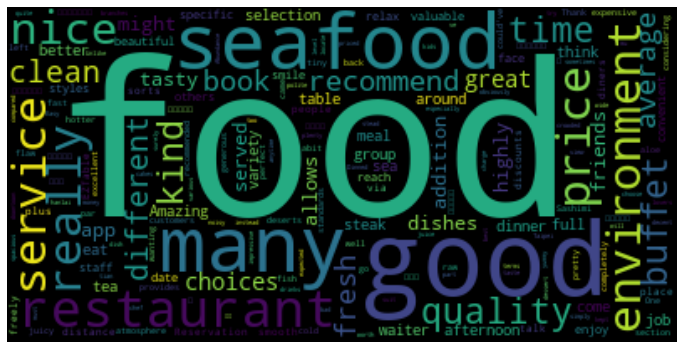

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

n = int(input("리뷰를 자세히 알아보고 싶은 음식점의 행번호를 입력하세요 : "))
reviews = r_review_crawling(n, city)

# review analysis

review_script = ' '.join(reviews)   
wc = WordCloud(max_font_size = 128, random_state = 30, stopwords = STOPWORDS).generate(review_script)
    
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()